### Kütüphane Ekleme

In [117]:
import numpy as np
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#nltk.download('stopwords')


### Veriyi Okutma

In [118]:
os.chdir('C:\\spam')
os.getcwd()
df=pd.read_csv('spam_ham_dataset.csv',error_bad_lines=False)

In [119]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [121]:
df["text"]=df['text'].values.astype('U')


In [122]:
df.shape

(5171, 4)

In [123]:
df.drop_duplicates(inplace=True)


In [124]:
df.shape

(5171, 4)

In [125]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

Text(0.5, 1.0, 'Distribution of Spam and Ham')

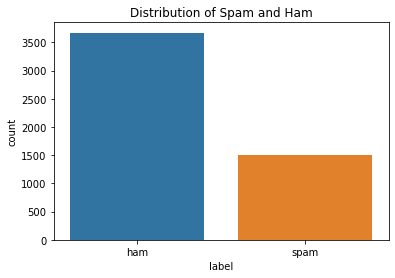

In [10]:
sns.countplot(x = "label", data = df)
df["label"].value_counts()
plt.title('Distribution of Spam and Ham')

Spam ve spam olmayan maillerin bar grafiğini çizdirdik. Spam olmayanların spam olanlardan daha fazla olduğunu görebiliriz.

## Veriyi Temizleme

In [126]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)


İhtiyacımız olmayan Unnamed: 0 değişkenini veri setinden çıkardık.

In [127]:
stopWords = set(stopwords.words('english'))

In [128]:
def process_text(text):
  #1-remove puncuation
  #2-remove stopwords
  #3-return a list of clean text words
  
  nopunc = [char for char in text if char not in string.punctuation]

  nopunc = ''.join(nopunc)
  clean_word = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  

  return clean_word

Noktalama işaretlerinden ve stop words'den(bağlaç, ek gibi tek başına anlam ifade etmeyen kelimeler) arındıran bir fonksiyon yazdık.

In [129]:
df['text'].head(50).apply(process_text) #tokenization

0     [Subject, enron, methanol, meter, 988291, foll...
1     [Subject, hpl, nom, january, 9, 2001, see, att...
2     [Subject, neon, retreat, ho, ho, ho, around, w...
3     [Subject, photoshop, windows, office, cheap, m...
4     [Subject, indian, springs, deal, book, teco, p...
5     [Subject, ehronline, web, address, change, mes...
6     [Subject, spring, savings, certificate, take, ...
7     [Subject, looking, medication, best, source, d...
8     [Subject, noms, actual, flow, 2, 26, agree, fo...
9     [Subject, nominations, oct, 21, 23, 2000, see,...
10    [Subject, vocable, rnd, word, asceticism, vcsc...
11    [Subject, report, 01405, wffur, attion, brom, ...
12    [Subject, enron, hpl, actuals, august, 28, 200...
13    [Subject, vic, odin, n, ow, berne, hotbox, car...
14    [Subject, tenaska, iv, july, darren, please, r...
15    [Subject, underpriced, issue, high, return, eq...
16    [Subject, first, delivery, wheeler, operating,...
17    [Subject, swift, may, 2001, vols, sean, fy

In [87]:
message_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])


In [18]:
#split test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message_bow, df['label_num'], test_size=0.2, random_state=0)

In [19]:
message_bow.shape #soldaki mail sağdaki unique words

(5171, 50381)

## MultiNomial Naive Bayes


Multinomial Naive Bayes algoritması, çoğunlukla Natural Language Processing'de (NLP) kullanılan olasılıksal bir öğrenme yöntemidir. Algoritma Bayes teoremine dayanır ve bir e-posta veya gazete makalesi gibi bir metnin etiketini tahmin eder.

In [20]:
mnb = MultinomialNB().fit(X_train, y_train)

In [21]:
print(mnb.predict(X_train))

[0 0 0 ... 1 0 0]


In [22]:
print(y_train.values)

[0 0 0 ... 1 0 0]


#### Confusion Matrix

Makine öğrenmesinde kullanılan sınıflandırma modellerinin performansını değerlendirmek için hedef niteliğe ait tahminlerin ve gerçek değerlerin karşılaştırıldığı hata matrisi sıklıkla kullanılmaktadır. 
* Doğruya doğru demek (True Positive – TP) DOĞRU
* Yanlışa yanlış demek (True Negative – TN) DOĞRU
* Doğruya yanlış demek (False Positive – FP) YANLIŞ
* Yanlışa doğru demek(False Negative – FN) YANLIŞ


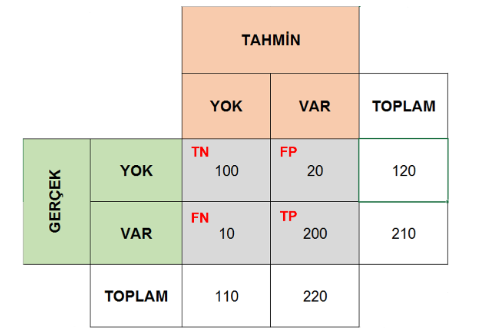

In [88]:
pred = mnb.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix \n', confusion_matrix(y_test, pred))
print()
print('Accuracy Score \n', accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       732
           1       0.95      0.96      0.96       303

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035


Confusion Matrix 
 [[718  14]
 [ 13 290]]

Accuracy Score 
 0.9739130434782609


* Accuracy Score %97'dir.
* Precision modelimizin veri setimiz üzerindeki başarısını gösterirken, recall ise modelimizin genel başarısını göstermektedir.
* F1 ise recall ve presicion değerlerinin harmonik ortalamasıdır.

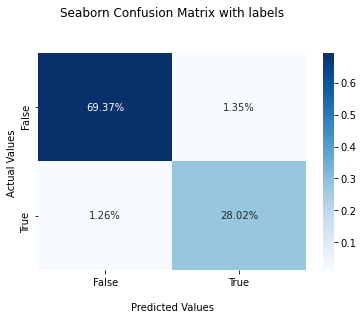

In [24]:
cf_matrix = confusion_matrix(y_test, pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


* Doğru tahmin edilmiş spam olmayan değerlerin yüzdesi 69.37'dir.
* Yanlış tahmin edilmiş spam olmayan değerlerin yüzdesi 1.35'dir.


* Doğru tahmin edilmiş spam olan değerlerin yüzdesi 28.02'dir.
* Yanlış tahmin edilmiş spam olan değerlerin yüzdesi 1.26'dır.




## RandomForest Classifier


Veri kümesinin çeşitli alt kümelerinde bir dizi karar ağacı içeren ve bu veri kümesinin tahmin doğruluğunu iyileştirmek için ortalamayı alan bir sınıflandırıcıdır.

In [26]:
rfc = RandomForestClassifier().fit(X_train, y_train)

In [27]:
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix \n', confusion_matrix(y_test, pred))
print()
print('Accuracy Score \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       732
           1       0.94      0.98      0.96       303

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035


Confusion Matrix 
 [[713  19]
 [  5 298]]

Accuracy Score 
 0.9768115942028985


* Accuracy Score %97,68'dir.

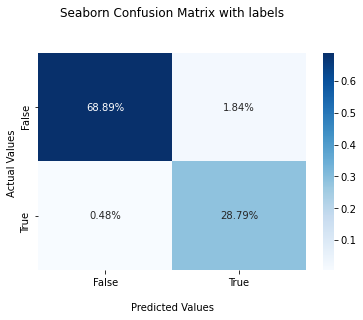

In [28]:
cf_matrix = confusion_matrix(y_test, pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


* Doğru tahmin edilmiş spam olmayan değerlerin yüzdesi 68.89'dur.
* Yanlış tahmin edilmiş spam olmayan değerlerin yüzdesi 1.84'tür.


* Doğru tahmin edilmiş spam olan değerlerin yüzdesi 28.79'dur.
* Yanlış tahmin edilmiş spam olan değerlerin yüzdesi 0.48'dir.


### XGBoost Classifier


Extreme Gradient Boosting'in kısaltması olan XGBoost, ölçeklenebilir bir karar ağacı makine öğrenimi kitaplığıdır. Regresyon, sınıflandırma ve sıralama sorunları için önde gelen makine öğrenimi kitaplığıdır.

In [29]:
xgb = XGBClassifier().fit(X_train, y_train)

[15:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix \n', confusion_matrix(y_test, pred))
print()
print('Accuracy Score \n', accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       732
           1       0.93      0.97      0.95       303

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035


Confusion Matrix 
 [[711  21]
 [  8 295]]

Accuracy Score 
 0.9719806763285024


* Accuracy Score %97,19'dur.

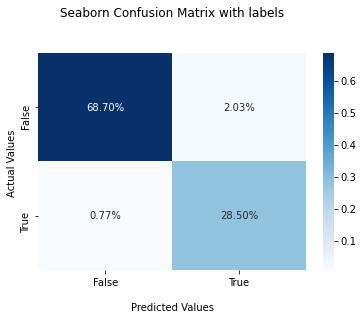

In [31]:
cf_matrix = confusion_matrix(y_test, pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


* Doğru tahmin edilmiş spam olmayan değerlerin yüzdesi 68.70'dir.
* Yanlış tahmin edilmiş spam olmayan değerlerin yüzdesi 2.03'tür.


* Doğru tahmin edilmiş spam olan değerlerin yüzdesi 28.50'dir.
* Yanlış tahmin edilmiş spam olan değerlerin yüzdesi 0.77'dir.


### Gradient Boost Classifier


Güçlü bir tahmine dayalı model oluşturmak için birçok zayıf öğrenme modelini bir araya getiren bir grup makine öğrenimi algoritmasıdır. Karar ağaçları genellikle Gradient Boost yapılırken kullanılır.

In [33]:
GB=GradientBoostingClassifier().fit(X_train, y_train)

In [34]:
pred = GB.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix \n', confusion_matrix(y_test, pred))
print()
print('Accuracy Score \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       732
           1       0.91      0.97      0.94       303

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035


Confusion Matrix 
 [[702  30]
 [  9 294]]

Accuracy Score 
 0.9623188405797102


* Accuracy Score %96,23'dür.

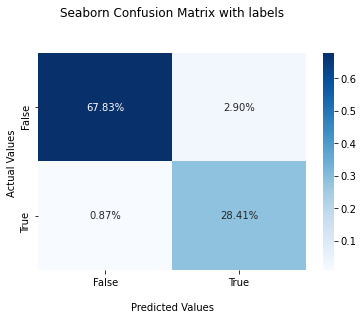

In [35]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


* Doğru tahmin edilmiş spam olmayan değerlerin yüzdesi 67.83'tür.
* Yanlış tahmin edilmiş spam olmayan değerlerin yüzdesi 2.90'dır.


* Doğru tahmin edilmiş spam olan değerlerin yüzdesi 28.41'dir.
* Yanlış tahmin edilmiş spam olan değerlerin yüzdesi 0.87'dir.

In [92]:
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Gradient Boosting": {"model":GradientBoostingClassifier(), "perf":0},
}
for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 11.96 sec
XGBoost              trained in 2.12 sec
MultinomialNB        trained in 0.01 sec
Gradient Boosting    trained in 57.48 sec


In [93]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["perf"]])

In [94]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,Random Forest,0.978744,11.96
1,MultinomialNB,0.973913,0.01
2,XGBoost,0.971981,2.12
3,Gradient Boosting,0.962319,57.48


### Modellerin Eğitme Süreleri ve Başarılarının Görselleştirilmesi

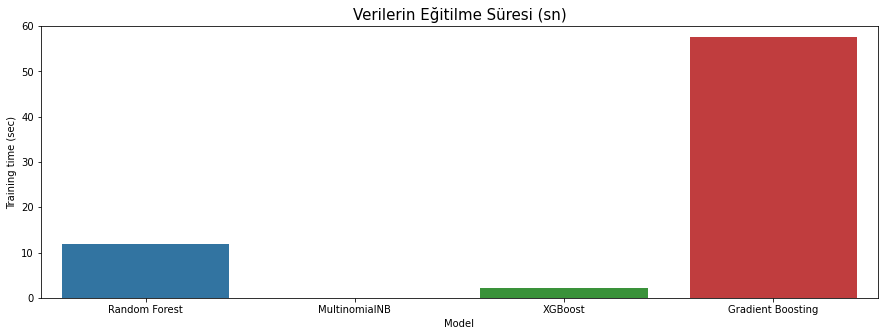

In [101]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Verilerin Eğitilme Süresi (sn)', fontsize = 15)
plt.ylim(0,60)
plt.show()

* Gradient Boosting'in en uzun süren, Multinomial Naive Bayes algoritmasının en kısa süren algoritma olduğunu görebiliriz.

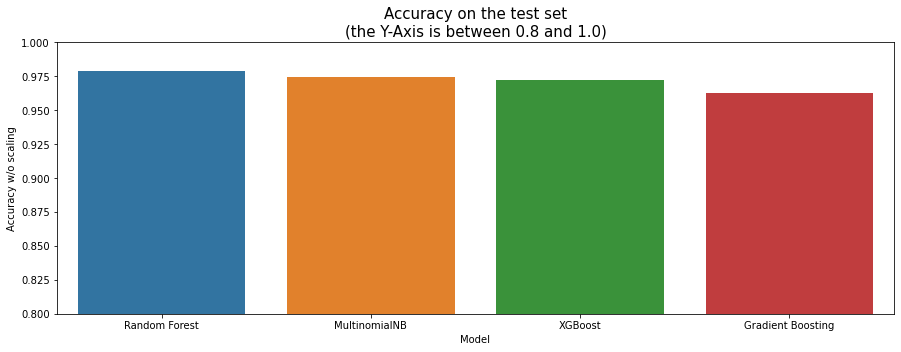

In [100]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = df_acc,)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.8,1)
plt.show()

* Random Forest algoritmasının en yüksek accuracy'e sahip algoritma olduğunu görebiliriz.

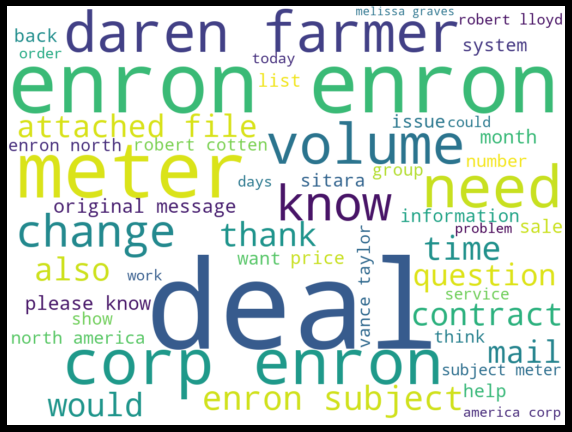

In [133]:
spam_words = "".join(list(df[df['label_num']==0] ["text_new"]))
spam_wc = WordCloud(width = 1024,height = 768,max_words=50,collocations=True,background_color="white", stopwords = stopWords).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = "k")
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")

plt.show()

* Burada WordCloud ile spam olmayan maillerde en çok kullanılan 50 kelimeyi görmekteyiz. Frekansı en yüksek olan kelimenin 'deal' olduğunu görüyoruz. Deal'ı enron, meter, volume gibi kelimelerin takip etmekte olduğunu görebiliriz.

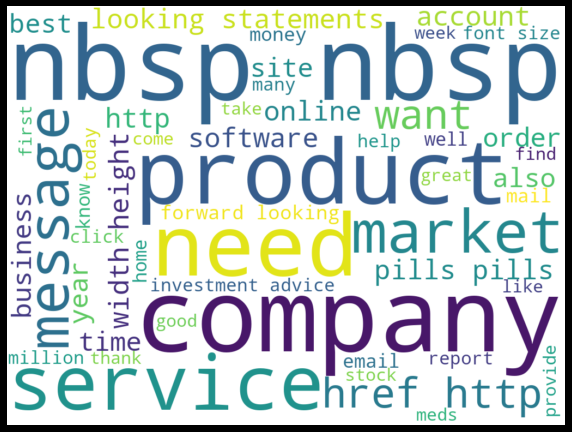

In [135]:
spam_words = "".join(list(df[df['label_num']==1] ["text_new"]))
spam_wc = WordCloud(width = 1024,height = 768,max_words=50,collocations=True,background_color="white" ,stopwords = stopWords).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = "k")
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")

plt.show()

Burada WordCloud ile spam olan maillerde en çok kullanılan 50 kelimeyi görmekteyiz. Frekansı en yüksek olan kelimenin 'Company' olduğunu görüyoruz. Company'i product, market, change gibi kelimelerin takip etmekte olduğunu görebiliriz.

In [130]:
df["text_new"]=df['text'].str.findall('\w{4,}').str.join(' ')

In [131]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stopWords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text_new'], 20)
for word, freq in common_words:
    print(word, freq)

subject 8060
enron 6555
2000 4386
please 3198
deal 2827
meter 2459
2001 2028
daren 1901
thanks 1898
corp 1776
know 1588
need 1480
mmbtu 1349
forwarded 1297
http 1235
price 1206
company 1195
information 1154
farmer 1141
attached 1097
